# Projeto Final: Detecção de transações bancarias fraudulentas
<hr>

#### Estudo e análise do dataset usando Machine Learning para identificar se uma transação é fraudulenta ou não <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Pergunta 1:
Sobre o dataset creditcard.csv, é INCORRETO afirmar:


Existem 5 tipos de dados presentes nesse dataset.

### Pergunta 2:
Sobre o dataset creditcard.csv, é CORRETO afirmar:


In [6]:
contagem_valores = df['Class'].value_counts()
quantidade_zeros = contagem_valores[0]
quantidade_uns = contagem_valores[1]

print(contagem_valores)

total_registros = len(df)

porcentagem_media_a = (quantidade_zeros / total_registros) * 100
porcentagem_media_b = (quantidade_uns / total_registros) * 100

print("Porcentagem média da coluna A:", round(porcentagem_media_a,2))
print("Porcentagem média da coluna B:", round(porcentagem_media_b,2))

Class
0    284315
1       492
Name: count, dtype: int64
Porcentagem média da coluna A: 99.83
Porcentagem média da coluna B: 0.17


Existe menos de 1% de instâncias classificadas como fraudulentas.

### Pergunta 3:
Sobre as estatísticas descritivas e características do dataset creditcard.csv, é INCORRETO afirmar:

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.loc[df['Class'] == 1, 'Time'].describe()

,Time
count,492.000000
mean,80746.806911
std,47835.365138
min,406.000000
25%,41241.500000
50%,75568.500000
75%,128483.000000
max,170348.000000


In [9]:
df.loc[df['Class'] == 0, 'Time'].describe()

,Time
count,284315.000000
mean,94838.202258
std,47484.015786
min,0.000000
25%,54230.000000
50%,84711.000000
75%,139333.000000
max,172792.000000


O valor máximo da variável Time é maior para a classe 1 (Class=1) do que a presente para as instâncias da classe 0 (Class=0).

### Pergunta 4:

Construa um boxplot da coluna “Amount” para as instâncias da classe 0 (Class=0) e da classe 1 (Class=1). Sobre esses boxplots e as estatísticas descritivas é CORRETO afirmar:

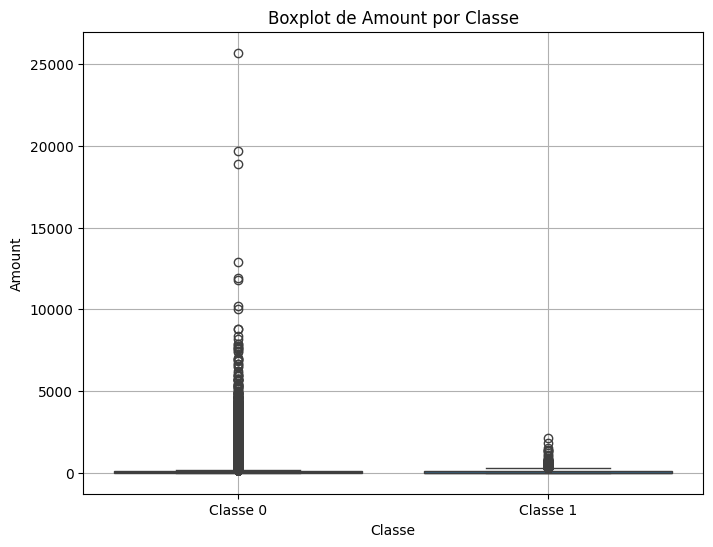

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot de Amount por Classe')
plt.xlabel('Classe')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Classe 0', 'Classe 1'])
plt.grid(True)
plt.show()

In [11]:

estatisticas_amount_por_classe = df.groupby('Class')['Amount'].describe()

print(estatisticas_amount_por_classe)

          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


O valor das transações (Amount) para as transações fraudulentas (Class=1) apresentam um Q1 maior do que o encontrado para as transações não fraudulentas (Class=0).

### Pergunta 5:
Encontre a matriz de correlação utilizando o coeficiente de correlação de Pearson para todas as variáveis presentes no dataset. Sobre essa matriz é INCORRETO afirmar:

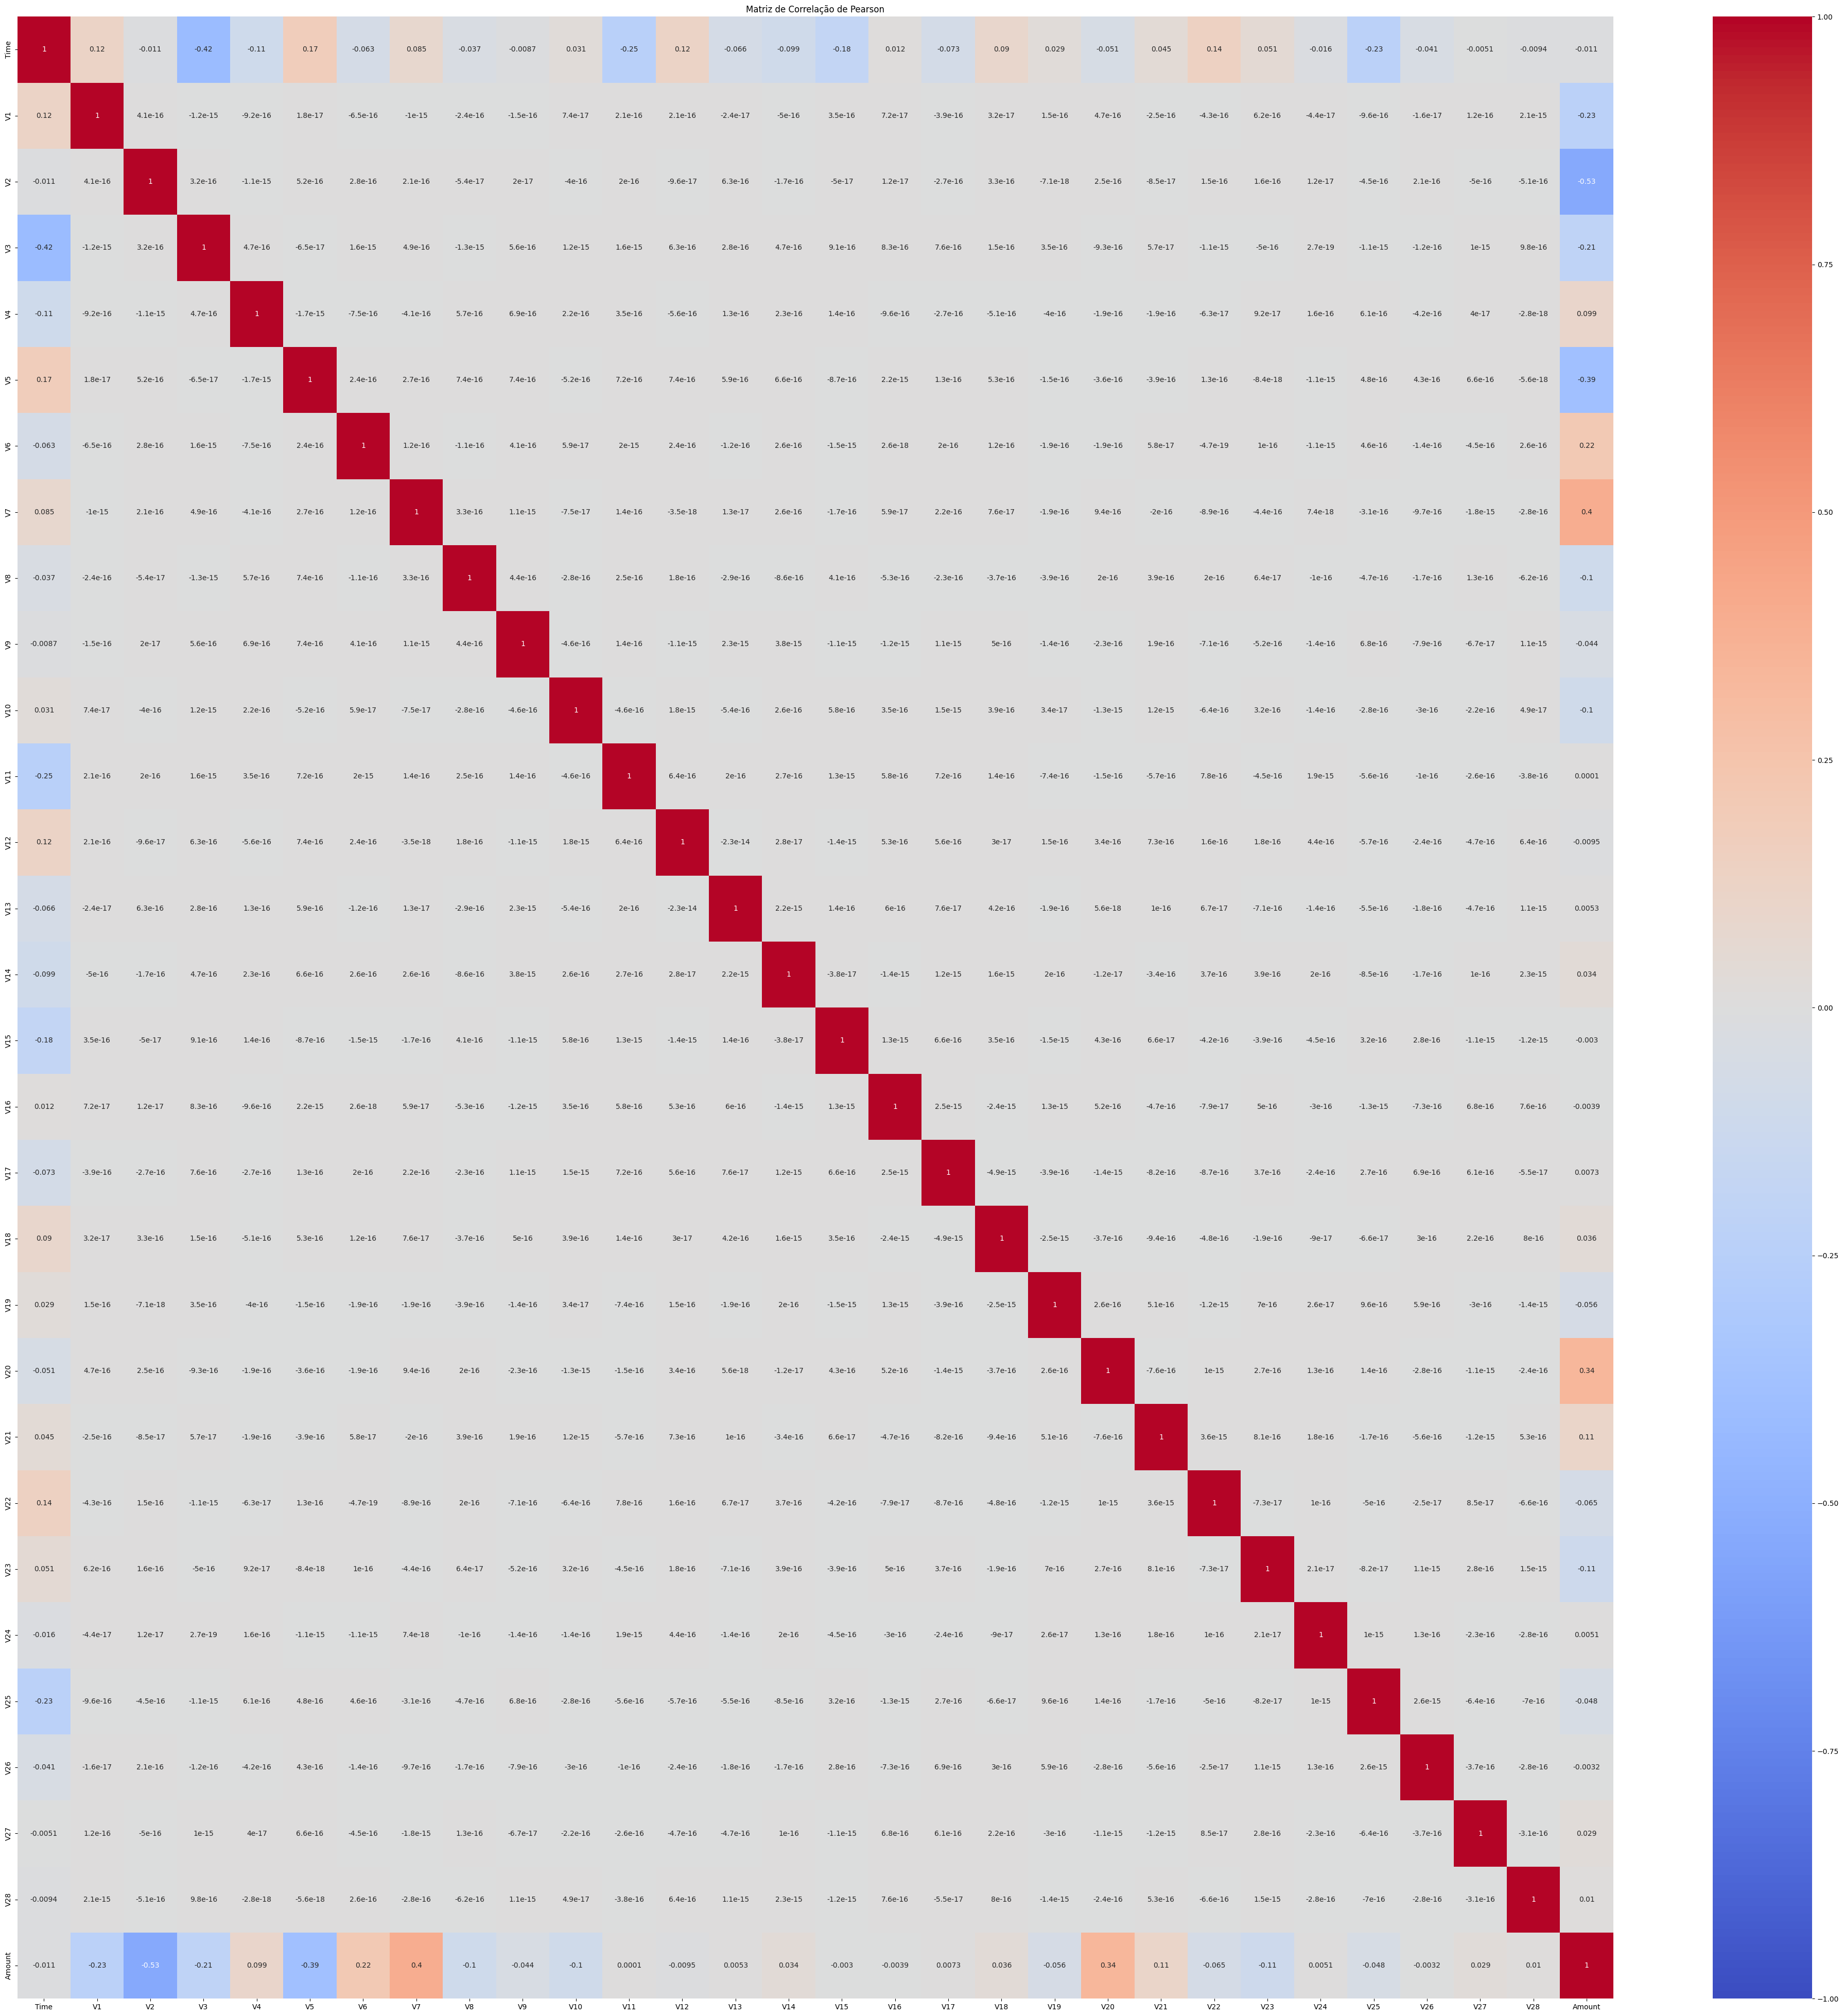

In [12]:
corr_matrix = df[['Time','V1','V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                  'V11','V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
                  'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Amount']].corr(method='pearson')

# Imprime a matriz de correlação
plt.figure(figsize=(50, 50))  # Ajusta o tamanho da figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação de Pearson')
plt.show()


Como foi aplicado o PCA, não é possível encontrar essa matriz de correlação.

### Pergunta 6:
Aplique a normalização StandardScaler() para as variáveis "Amount" e “Time”. Após essa normalização qual é o valor máximo, em módulo, para a variável “Amount”?

In [13]:
features = ['Time', 'Amount']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
max_amount = df['Amount'].max()

print(round(max_amount,2))

102.36


### Pergunta 7:
Selecione a quantidade de clusters igual a 4 e aplique o algoritmo k-means. Para essa quantidade de clusters, qual cluster apresenta a maior quantidade de instâncias marcadas como transações fraudulentas (Class=1)?

In [14]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_clusters = 4
k_means_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
k_means_pca.fit(X_train_scaled)

labels_test = k_means_pca.predict(X_test_scaled)

df_clusters = pd.DataFrame({'Cluster': labels_test, 'Class': y_test})

fraude_por_cluster = df_clusters.groupby('Cluster')['Class'].agg(['count', 'sum'])
fraude_por_cluster.rename(columns={'count': 'Total_Instancias', 'sum': 'Total_Fraudes'}, inplace=True)

fraude_por_cluster['Proporcao_Fraudes'] = fraude_por_cluster['Total_Fraudes'] / fraude_por_cluster['Total_Instancias']

cluster_maior_fraude = fraude_por_cluster['Total_Fraudes'].idxmax()
quantidade_maior_fraude = fraude_por_cluster.loc[cluster_maior_fraude, 'Total_Fraudes']

print("Quantidade de instâncias e total de fraudes por cluster no conjunto de teste:")
print(fraude_por_cluster)
print(cluster_maior_fraude)

Quantidade de instâncias e total de fraudes por cluster no conjunto de teste:
         Total_Instancias  Total_Fraudes  Proporcao_Fraudes
Cluster                                                    
0                   10749             30           0.002791
1                    1212              5           0.004125
2                   39395             61           0.001548
3                   34087             40           0.001173
2


### Pergunta 8:
Após a normalização utilizando o StandardScaler() para as variáveis “Amount” e “Time”, selecione como saída a variável “Class” e como entrada o restante das colunas. Aplique o train_test_split(), como mostrado no enunciado deste desafio. Após o train_test_split, quantos valores para a classe de fraudes (Class=1) existem para o dataset de teste?

In [15]:
colunas_normalizar = ['Amount', 'Time']
scaler = StandardScaler()
df[colunas_normalizar] = scaler.fit_transform(df[colunas_normalizar])

y = df['Class']
X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
quantidade_fraudes_teste = y_test.sum()

print(quantidade_fraudes_teste)

136


### Pergunta 9:
Após a aplicação do StandardScaler() e do train_test_split(), como mostrado no enunciado, utilize como saída a variável “Class” e como entrada o restante das colunas. Aplique o algoritmo de classificação por meio da Regressão Logística, como mostrado no enunciado. Qual é o valor aproximado para a acurácia do modelo?

In [16]:
colunas_normalizar = ['Amount', 'Time']
scaler = StandardScaler()
df[colunas_normalizar] = scaler.fit_transform(df[colunas_normalizar])

y = df['Class']
X = df.drop('Class', axis=1)
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

acuracia = accuracy_score(y_test, y_pred)

print(round(acuracia,3))

0.999


### Pergunta 10:
Após a aplicação do StandardScaler() e do train_test_split() como mostrado no enunciado, utilize como saída a variável “Class” e como entrada o restante das colunas. Aplique o algoritmo de classificação por meio da Regressão Logística como mostrado no enunciado. Qual é o valor aproximado do recall obtido?

In [17]:
y = df['Class']
X = df.drop('Class', axis=1)
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
recall = recall_score(y_test, y_pred)

print(round(recall,2))

0.62


### Pergunta 11:
Após a aplicação do StandardScaler() e do train_test_split(), como mostrado no enunciado, utilize como saída a variável “Class” e como entrada o restante das colunas. Aplique o algoritmo de classificação por meio da rede neural MLP, como mostrado no enunciado. Qual é o valor aproximado para a acurácia do modelo?

In [18]:
X = df.drop('Class', axis=1)
y = df['Class']


scaler = StandardScaler()

entrada_normalizada = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(entrada_normalizada, y, test_size=0.3, random_state=42)

mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=(10,),
                    activation='relu', solver='adam', random_state=1)

mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(round(accuracy_mlp,3))

0.999


### Pergunta 13:
Agora, aplique o modelo de subamostragem, como mostrado no enunciado da questão, sobre os dados normalizados por meio do StandardScaler(). Divida, novamente, os dados entre treinamento e teste por meio do train_test_split(). Quantas instâncias fraudulentas (Class=1) existem nos dados de treinamento?

In [19]:
# conforme enunciado
n_fraude = len(df[df.Class == 1])
indices_fraude = np.array(df[df.Class == 1].index)
indices_sem_fraude = np.array(df[df.Class == 0].index)

np.random.seed(0)
escolha_sem_fraude = np.random.choice(indices_sem_fraude, n_fraude, replace=False)
indices_subamostragem = np.concatenate([indices_fraude, escolha_sem_fraude], axis=None)

dados_subamostrados = df.iloc[indices_subamostragem, :]
entradas_subamostradas = dados_subamostrados[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                                             'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                                             'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
                                             'Amount', 'Time']]
saida_subamostrada = dados_subamostrados[['Class']]


scaler = StandardScaler()

entradas_normalizadas_subamostra = scaler.fit_transform(entradas_subamostradas)
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
    entradas_normalizadas_subamostra,
    saida_subamostrada['Class'], test_size=0.3, random_state=42)

n_fraude_train = np.sum(y_train_sub == 1)

print(n_fraude_train)

342


### Pergunta 13:
Após a normalização (StandardScaler()), divisão dos dados entre treinamento e teste (train_test_split()) e subamostragem (seguindo os comandos apresentados no enunciado), aplique o algoritmo de classificação por meio da regressão logística, como mostrado no enunciado. Qual é o valor aproximado da acurácia obtida?

In [20]:


# Supondo que 'df' seja o seu DataFrame original

# 1. Subamostragem (como definido anteriormente)
n_fraude = len(df[df.Class == 1])
indices_fraude = np.array(df[df.Class == 1].index)
indices_sem_fraude = np.array(df[df.Class == 0].index)

np.random.seed(0)
escolha_sem_fraude = np.random.choice(indices_sem_fraude, n_fraude, replace=False)
indices_subamostragem = np.concatenate([indices_fraude, escolha_sem_fraude], axis=None)

dados_subamostrados = df.iloc[indices_subamostragem, :]
entradas_subamostradas = dados_subamostrados[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                                             'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                                             'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
                                             'Amount', 'Time']]
saida_subamostrada = dados_subamostrados['Class']

# 2. Normalização (StandardScaler) dos dados subamostrados
scaler = StandardScaler()
entradas_normalizadas_subamostra = scaler.fit_transform(entradas_subamostradas)

# 3. Divisão dos dados subamostrados e normalizados em treinamento e teste
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
    entradas_normalizadas_subamostra, saida_subamostrada, test_size=0.3, random_state=42
)

# 4. Aplicar o algoritmo de classificação por meio da Regressão Logística
lr_subamostrado = LogisticRegression(max_iter=1000, random_state=42)
lr_subamostrado.fit(X_train_sub, y_train_sub)

# Fazer as previsões no conjunto de teste subamostrado
y_pred_subamostrado = lr_subamostrado.predict(X_test_sub)

# Calcular a acurácia do modelo nos dados de teste subamostrados
accuracy_subamostrado = accuracy_score(y_test_sub, y_pred_subamostrado)

print(round(accuracy_subamostrado,2))

0.93


### Pergunta 14:
Após a normalização (StandardScaler()), divisão dos dados entre treinamento e teste (train_test_split()) e subamostragem (seguindo os comandos apresentados no enunciado), aplique o algoritmo de classificação por meio da rede neural MLP, como mostrado no enunciado. Qual é o valor aproximado da acurácia obtida?

In [21]:
n_fraude = len(df[df.Class == 1])
indices_fraude = np.array(df[df.Class == 1].index)
indices_sem_fraude = np.array(df[df.Class == 0].index)

np.random.seed(0)
escolha_sem_fraude = np.random.choice(indices_sem_fraude, n_fraude, replace=False)
indices_subamostragem = np.concatenate([indices_fraude, escolha_sem_fraude], axis=None)

dados_subamostrados = df.iloc[indices_subamostragem, :]
entradas_subamostradas = dados_subamostrados[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                                             'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                                             'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
                                             'Amount', 'Time']]
saida_subamostrada = dados_subamostrados['Class']

scaler = StandardScaler()
entradas_normalizadas_subamostra = scaler.fit_transform(entradas_subamostradas)

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
    entradas_normalizadas_subamostra, saida_subamostrada, test_size=0.3, random_state=42)

mlp_subamostrado = MLPClassifier(alpha=0.001, hidden_layer_sizes=(10,),
                                 activation='relu', solver='adam', random_state=1)
mlp_subamostrado.fit(X_train_sub, y_train_sub)
y_pred_mlp_subamostrado = mlp_subamostrado.predict(X_test_sub)

accuracy_mlp_subamostrado = accuracy_score(y_test_sub, y_pred_mlp_subamostrado)

print(round(accuracy_mlp_subamostrado,2))

0.92


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Pergunta 15:
Após a normalização (StandardScaler()), divisão dos dados entre treinamento e teste (train_test_split()) e subamostragem (), aplique o algoritmo de classificação por meio da regressão logística, como mostrado no enunciado. Qual é o valor aproximado do recall obtido?

In [22]:

n_fraude = len(df[df.Class == 1])
indices_fraude = np.array(df[df.Class == 1].index)
indices_sem_fraude = np.array(df[df.Class == 0].index)

np.random.seed(0)
escolha_sem_fraude = np.random.choice(indices_sem_fraude, n_fraude, replace=False)
indices_subamostragem = np.concatenate([indices_fraude, escolha_sem_fraude], axis=None)

dados_subamostrados = df.iloc[indices_subamostragem, :]
entradas_subamostradas = dados_subamostrados[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                                             'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                                             'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
                                             'Amount', 'Time']]
saida_subamostrada = dados_subamostrados['Class']

scaler = StandardScaler()
entradas_normalizadas_subamostra = scaler.fit_transform(entradas_subamostradas)

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
    entradas_normalizadas_subamostra, saida_subamostrada, test_size=0.3, random_state=42
)

lr_subamostrado = LogisticRegression(max_iter=1000, random_state=42)
lr_subamostrado.fit(X_train_sub, y_train_sub)
y_pred_subamostrado = lr_subamostrado.predict(X_test_sub)
recall_subamostrado = recall_score(y_test_sub, y_pred_subamostrado)

print(round(recall_subamostrado,2))

0.87
